In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

analysis of directors and their average profit & popularity

In [57]:
allfactors["cast"] = allfactors["cast"].str.split("|")
allfactors = allfactors.explode("cast")
allfactors["director"] = allfactors["director"].str.split("|")
allfactors = allfactors.explode("director")
allfactors


,budget,cast,director,genres,production_companies,release_year,release_date,runtime,popularity,profit,month
0,150000000.0,Chris Pratt,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Bryce Dallas Howard,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Irrfan Khan,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Vincent D'Onofrio,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
0,150000000.0,Nick Robinson,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,2015-06-09,124,32.985763,1.363529e+09,06
...,...,...,...,...,...,...,...,...,...,...,...
1286,2700000.0,John Belushi,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Tim Matheson,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,John Vernon,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07
1286,2700000.0,Verna Bloom,John Landis,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978,1978-07-27,109,1.157930,1.383000e+08,07


In [58]:
allfactors.groupby('director')[['popularity']].mean().sort_values(['popularity'], ascending=False)

,popularity
director,
Colin Trevorrow,32.985763
George Miller,14.675428
Chad Stahelski,11.422751
David Leitch,11.422751
Christopher Nolan,8.635610
...,...
Dan Cutforth,0.050524
Taika Waititi,0.028456
Nathan Frankowski,0.021371


In [59]:
allfactors.groupby('director')[['profit']].mean().sort_values(['profit'], ascending=False)


,profit
director,
Colin Trevorrow,1.363529e+09
Joss Whedon,1.212297e+09
Jennifer Lee,1.124219e+09
Kyle Balda,1.082731e+09
James Cameron,1.066388e+09
...,...
Steve 'Spaz' Williams,-4.261595e+07
Steven Zaillian,-4.554910e+07
Lawrence Kasanoff,-6.492629e+07


In [60]:
allfactors.groupby('cast')[['popularity']].mean().sort_values(['popularity'], ascending=False)

,popularity
cast,
Nick Robinson,32.985763
Josh Helman,28.419936
Hugh Keays-Byrne,28.419936
Dave Bautista,14.311205
Ansel Elgort,13.112507
...,...
Matthew Settle,0.015997
Yanina Studilina,0.010335
Heiner Lauterbach,0.010335


In [61]:
allfactors.groupby('cast')[['profit']].mean().sort_values(['profit'], ascending=False)


,profit
cast,
Adam Driver,1.868178e+09
Daisy Ridley,1.868178e+09
Billy Zane,1.645034e+09
Nick Robinson,1.363529e+09
Stephen Lang,1.251650e+09
...,...
Kate Bosworth,-9.866597e+07
Elisabeth Harnois,-1.110072e+08
Breckin Meyer,-1.110072e+08


<AxesSubplot:xlabel='month', ylabel='profit'>

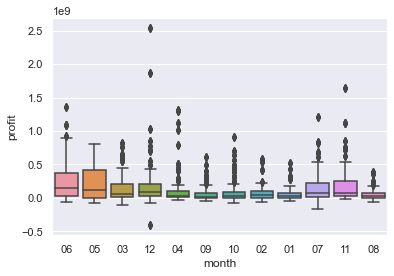

In [62]:
sb.boxplot(data=allfactors, x="month", y="profit", orient = 'v')

<AxesSubplot:xlabel='month', ylabel='popularity'>

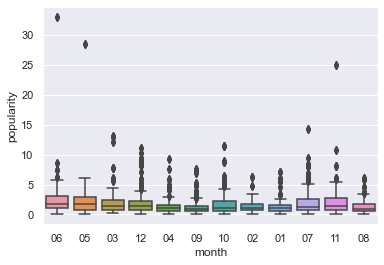

In [63]:
sb.boxplot(data=allfactors, x="month", y="popularity", orient = 'v')